Connected to base (Python 3.11.9)

In [ ]:
import geopandas as gpd

In [ ]:
#in same dir:  `.shx` and `.dbf`
filepath = "data/shp/austin_pop_2019.shp"
data = gpd.read_file(filepath)

In [ ]:
filepath = "data/austin_pop_2019.gpkg"
data = gpd.read_file(filepath)
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


<Axes: >

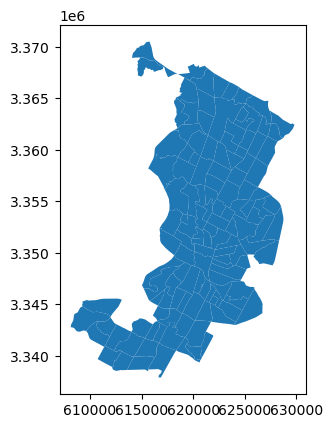

In [ ]:
data.plot()

<Axes: >

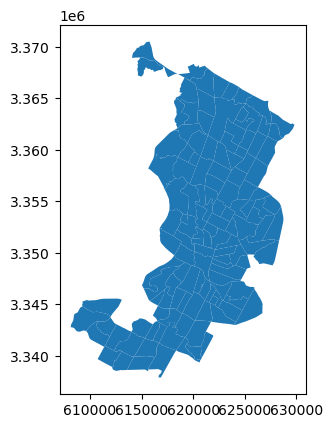

In [ ]:
data.plot()

In [ ]:
type(data["geometry"])

geopandas.geoseries.GeoSeries

In [ ]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [ ]:
data["geometry"].area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

In [ ]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

KeyError: 'area_km2'

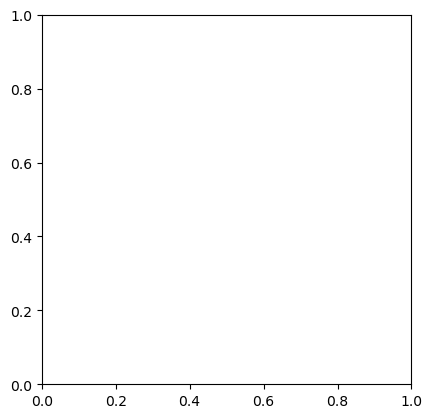

In [ ]:
data.plot(column="area_km2", legend=True)

In [ ]:
import geopandas as gpd

In [ ]:
#in same dir:  `.shx` and `.dbf`
filepath = "data/shp/austin_pop_2019.shp"
data = gpd.read_file(filepath)

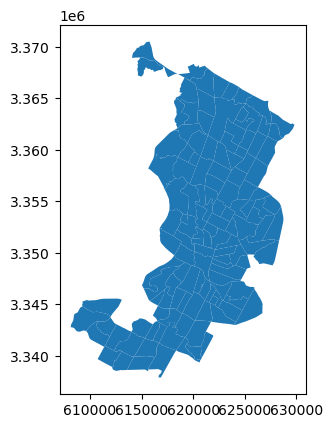

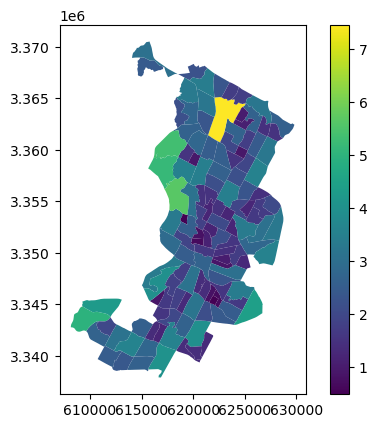

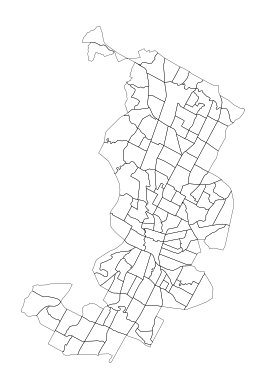

In [ ]:
import geopandas as gpd

#in same dir:  `.shx` and `.dbf`
filepath = "data/shp/austin_pop_2019.shp"
data = gpd.read_file(filepath)

filepath = "data/austin_pop_2019.gpkg"
data = gpd.read_file(filepath)
type(data)

data.head()

data.plot()

type(data["geometry"])

data["geometry"].head()

data["geometry"].area

#data.area is just a shorthand for data.geometry.area
data["area_km2"] = data.area / 1000000
data.head()

data.plot(column="area_km2", legend=True)

filepath = "data/austin_pop_density_2019.gpkg"
data = gpd.read_file(filepath)

data.head()

type(data["geometry"].values[0])

import matplotlib.pyplot as plt
data.plot(facecolor="none", linewidth=0.2)
plt.axis("off")
plt.show()

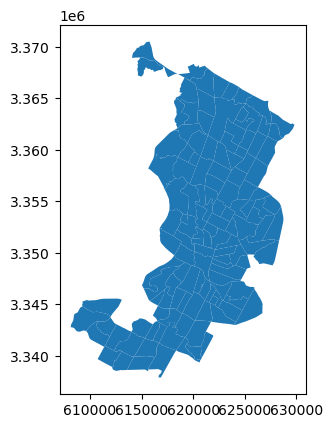

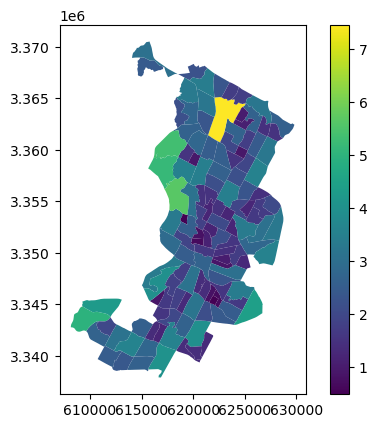

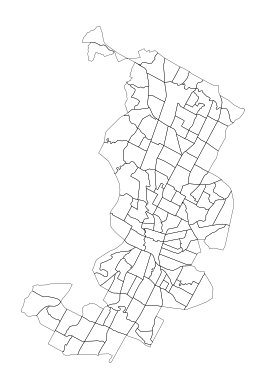

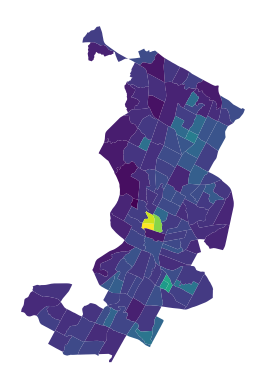

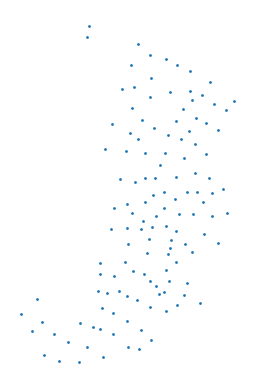

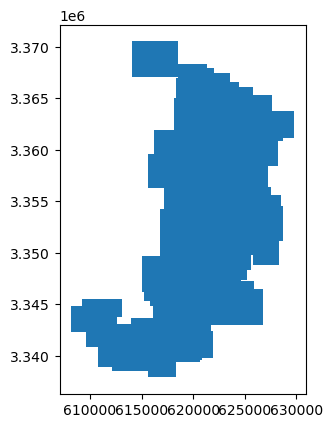

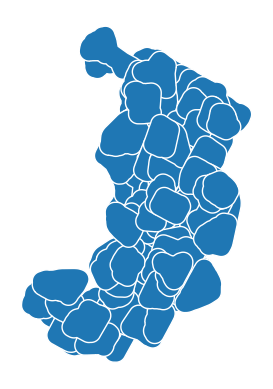

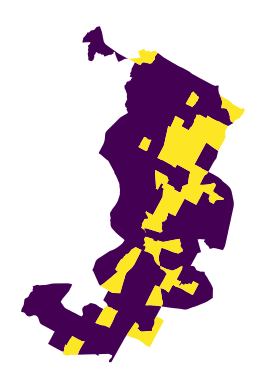

N tracts 130


In [ ]:
import geopandas as gpd

#in same dir:  `.shx` and `.dbf`
filepath = "data/shp/austin_pop_2019.shp"
data = gpd.read_file(filepath)

filepath = "data/austin_pop_2019.gpkg"
data = gpd.read_file(filepath)
type(data)

data.head()

data.plot()

type(data["geometry"])

data["geometry"].head()

data["geometry"].area

#data.area is just a shorthand for data.geometry.area
data["area_km2"] = data.area / 1000000
data.head()

data.plot(column="area_km2", legend=True)

filepath = "data/austin_pop_density_2019.gpkg"
data = gpd.read_file(filepath)

data.head()

type(data["geometry"].values[0])

import matplotlib.pyplot as plt
data.plot(facecolor="none", linewidth=0.2)
plt.axis("off")
plt.show()

data.plot(column="pop_density_km2")
plt.axis("off")
plt.show()

data["geometry"].centroid.head()

data.centroid.plot(markersize=1)
plt.axis("off")
plt.show()

data["centroid"] = data.centroid

data[['tract', 'centroid', 'geometry']]
data.set_geometry('centroid')
data['geometry'].area

data.envelope.head()

data.envelope.plot()

data.total_bounds

from shapely import Point, Polygon
point1 = Point(data.total_bounds[0], data.total_bounds[1])
point2 = Point(data.total_bounds[2], data.total_bounds[1])
point3 = Point(data.total_bounds[2], data.total_bounds[3])
point4 = Point(data.total_bounds[0], data.total_bounds[3])
poly = Polygon([point1, point2, point3, point4])
#poly

data.buffer(1000).plot(edgecolor="white") #1000 meters
plt.axis("off")
plt.show()

# Create a new column and add a constant value
data["dense"] = 0

# Filter rows with above average pop density and update the column dense
data.loc[data["pop_density_km2"] > data["pop_density_km2"].mean(), "dense"] = 1
data.dense.value_counts()

dissolved = data[["pop2019", "area_km2", "dense", "geometry"]].dissolve(
    by="dense", aggfunc="sum"
)
#aggregation step set index to "dense", reset to default
dissolved = dissolved.reset_index()
dissolved

dissolved['geometry']

dissolved.plot(column="dense")
plt.axis("off")
plt.show()

data_for_join = data[["tract", "geometry"]]
print("N tracts " + str(len(data_for_join)))
join_to_self = gpd.sjoin_nearest(data_for_join, data_for_join, how='inner', distance_col="distance")

In [ ]:
data.columns()

TypeError: 'Index' object is not callable

In [ ]:
data.columns

Index(['pop2019', 'tract', 'area_km2', 'pop_density_km2', 'geometry',
       'centroid', 'dense'],
      dtype='object')

In [ ]:
data.columns

data['dense'].buffer(500)

AttributeError: 'Series' object has no attribute 'buffer'

In [ ]:
data.columns

geo = dissolved['geometry'].buffer(500)

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

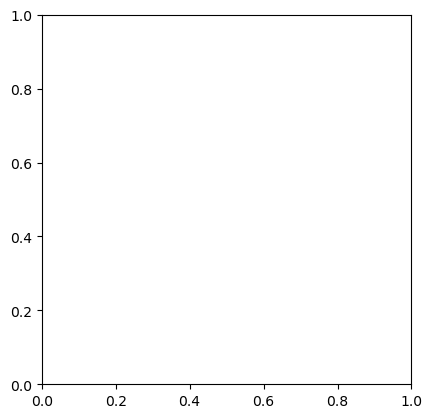

In [ ]:
data.columns

geo = dissolved['geometry'].buffer(500)

geo.plot(dissolved)

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

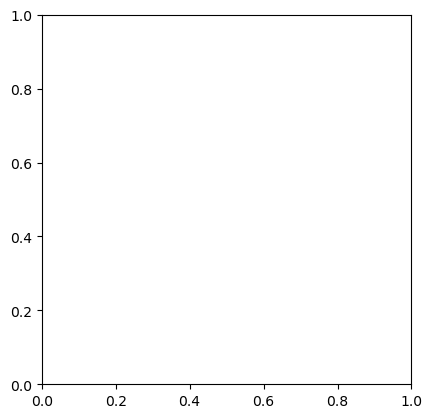

In [ ]:
data.columns

geo = dissolved['geometry'].buffer(500)

geo.plot(dissolved)

In [ ]:
dissolved

,dense,geometry,pop2019,area_km2
0,0,"MULTIPOLYGON (((614108.23 3339640.551, 614288....",368992.0,231.131494
1,1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.234570


ValueError: Boolean array expected for the condition, not int64

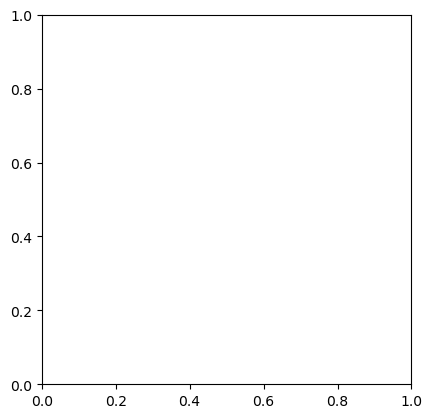

In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo.plot(dissolved)

In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo

,dense,geometry,pop2019,area_km2
1,1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.23457


AttributeError: PatchCollection.set() got an unexpected keyword argument 'columns'

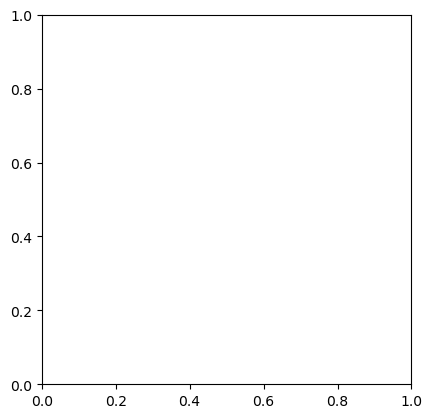

In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo.plot(columns = 'geometry')

In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo.head()

,dense,geometry,pop2019,area_km2
1,1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.23457


In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo.head()

,dense,geometry,pop2019,area_km2
1,1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.23457


In [ ]:
data.columns

geo = dissolved[dissolved['dense'] == 1]

geo.head()

,dense,geometry,pop2019,area_km2
1,1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.23457


<Axes: >

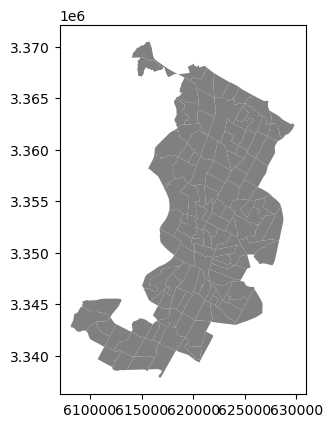

In [ ]:
data.plot(color = 'grey')

In [ ]:
data.columns

Index(['pop2019', 'tract', 'area_km2', 'pop_density_km2', 'geometry',
       'centroid', 'dense'],
      dtype='object')

In [ ]:
data['dense']

0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    0
127    1
128    0
129    0
Name: dense, Length: 130, dtype: int64

<Axes: >

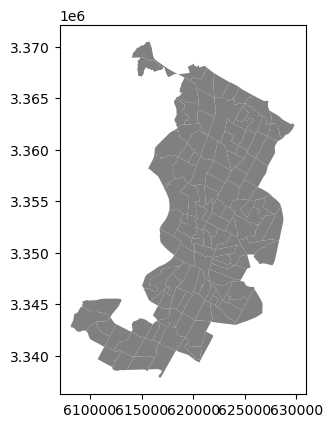

In [ ]:
data.plot(color = 'grey')

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = dissolved['geometry']

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = dissolved['geometry']

geo.head()

0    MULTIPOLYGON (((614108.23 3339640.551, 614288....
1    MULTIPOLYGON (((612263.531 3338931.8, 612265.2...
Name: geometry, dtype: geometry

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo['geometry']

geo.head()

1    MULTIPOLYGON (((612263.531 3338931.8, 612265.2...
Name: geometry, dtype: geometry

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo['geometry']

geo.envolope.plot()

AttributeError: 'GeoSeries' object has no attribute 'envolope'

<Axes: >

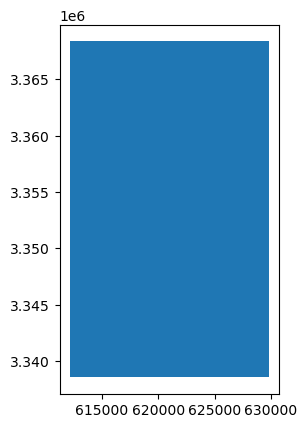

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo['geometry']

geo.envelope.plot()

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.buffer(500)

<Axes: >

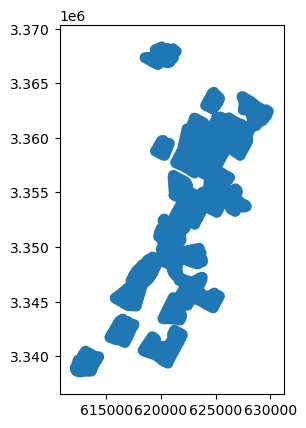

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.buffer(500)


geo.plot()

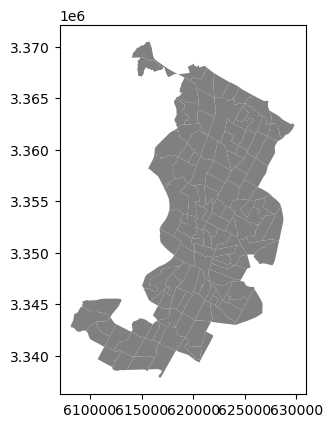

In [ ]:
austin = data.plot(color = 'grey')

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.buffer(500)


geo.plot(ax = austin, alpha = .5)

<Axes: >

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.buffer(500)


geo.plot(ax = austin, alpha = 0.5)

<Axes: >

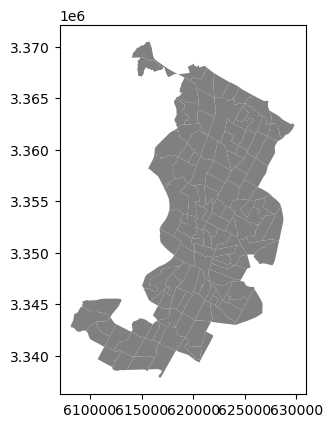

In [ ]:
austin = data.plot(color = 'grey')

<Axes: >

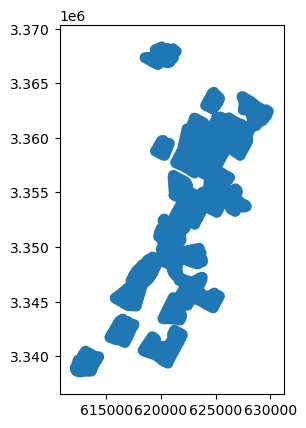

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.buffer(500)

geo.plot()

geo.plot(ax = austin, alpha = 0.5)

<Axes: >

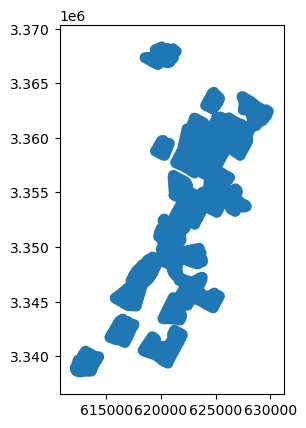

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot()

geo.plot(ax = austin, alpha = 0.5)

<Axes: >

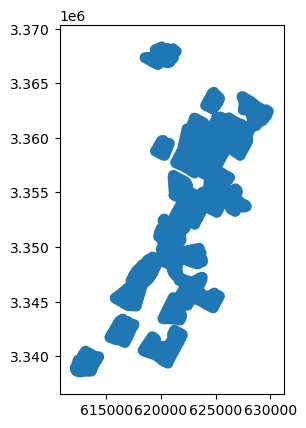

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot()

geo.plot(ax = austin)

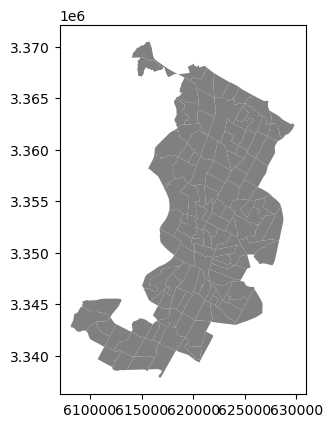

In [ ]:
austin = data.plot(color = 'grey')

<Axes: >

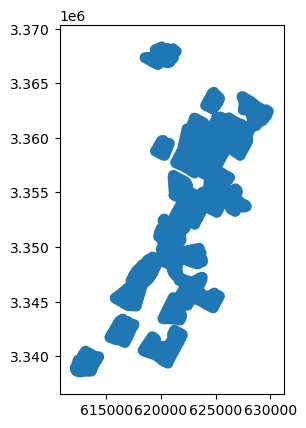

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot()

geo.plot(ax = austin)

<Axes: >

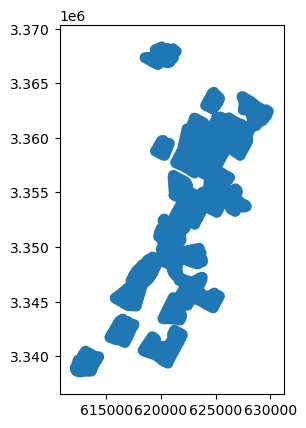

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot()

geo.plot(ax = austin, alpha = .5)

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)



geo.plot(ax = austin, alpha = .5)

<Axes: >

<Axes: >

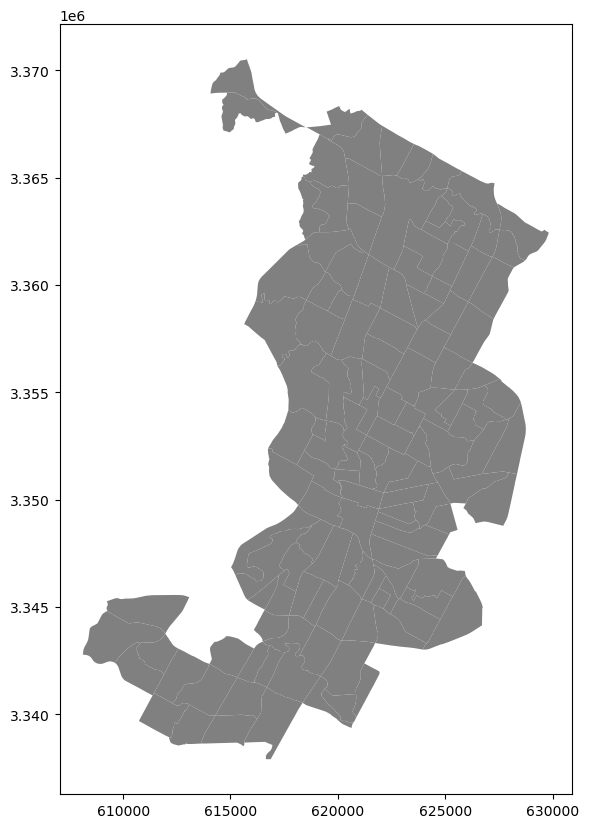

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

ax = data.plot(color='grey', figsize=(10, 10))

geo.plot(ax = austin, alpha = .5)

<Axes: >

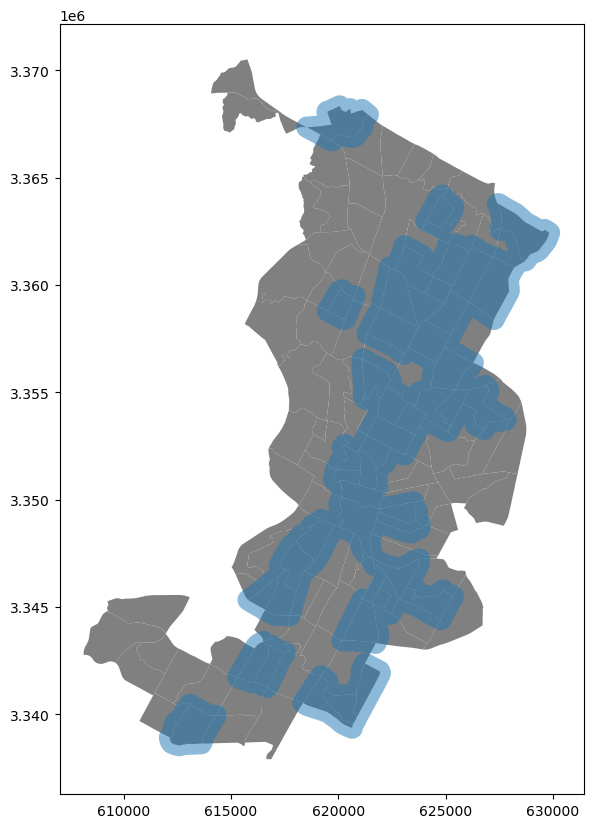

In [ ]:
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

ax = data.plot(color='grey', figsize=(10, 10))

geo.plot(ax = ax, alpha = .5)

<Axes: >

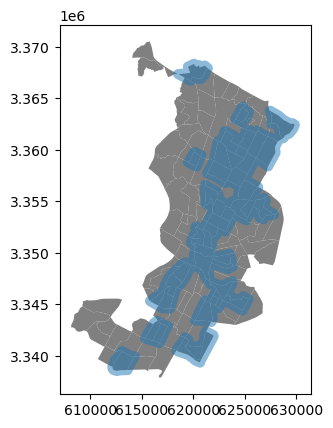

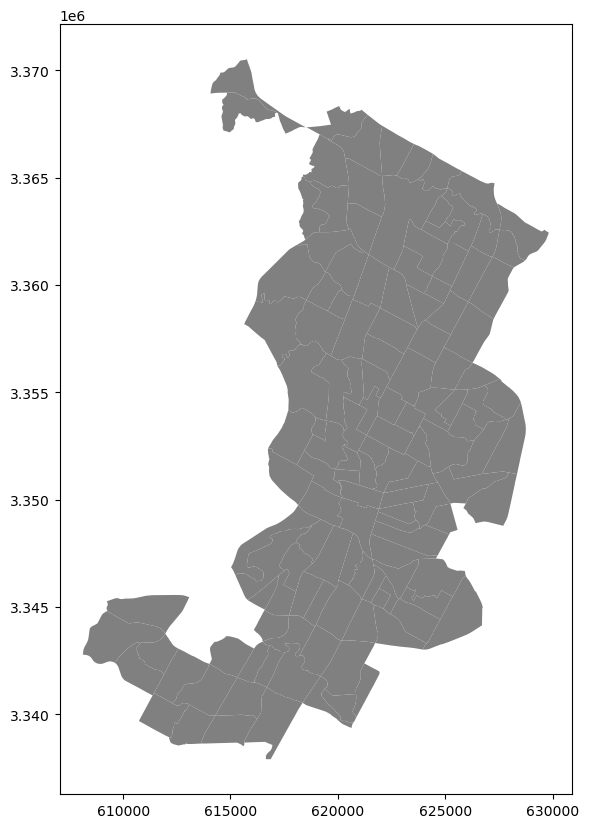

In [ ]:
austin = data.plot(color = 'grey')
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

ax = data.plot(color='grey', figsize=(10, 10))

geo.plot(ax = austin, alpha = .5)

<Axes: >

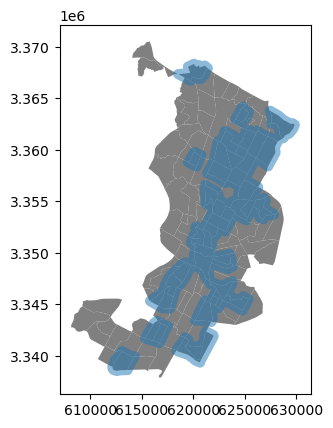

In [ ]:
austin = data.plot(color = 'grey')
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot(ax = austin, alpha = .5)

In [ ]:
austin = data.plot(color = 'grey')
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot(ax = austin alpha = .5)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-57-0891b96f2e76>, line 8)

<Axes: >

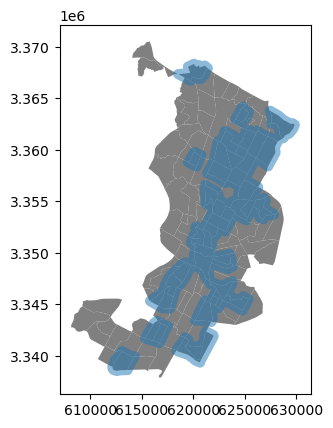

In [ ]:
austin = data.plot(color = 'grey')
geo = dissolved[dissolved['dense'] == 1]

geo = geo.reset_index()

geo = geo.buffer(500)

geo.plot(ax = austin, alpha = .5)